Exploring The Dataset

In [1]:
# ! pip install nbformat #To display graphs

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import sklearn as sk
import seaborn as sns
import scipy
import kagglehub
import nltk
print("Tensorflow:",tf.__version__)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("SKLearn:", sk.__version__)
print("Seaborn:", sns.__version__)
print('SciPy', scipy.__version__)
print('nltk', nltk.__version__)


2025-11-16 11:35:05.976127: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/srirama/sr_proj/tf-venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Tensorflow: 2.20.0
Pandas: 2.3.3
NumPy: 2.3.4
Matplotlib: 3.10.7
SKLearn: 1.7.2
Seaborn: 0.13.2
SciPy 1.16.3
nltk 3.9.2


In [3]:
%%time
# Visualization libraries
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

# Text processing
import emoji
from textblob import TextBlob
import contractions

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest


CPU times: user 117 ms, sys: 40.5 ms, total: 158 ms
Wall time: 143 ms


In [4]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist

In [5]:
# %%time
# # Download required NLTK data
# nltk.download('punkt_tab')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [6]:
from pathlib import Path
NOTEBOOK_DIR  = Path().resolve()
BASE_DIR = NOTEBOOK_DIR.parents[1]
DATASET_DIR = BASE_DIR /  "data" / 'TwitterSentimentAnalysisDataset' 
DATASET_FILE_PATH = DATASET_DIR / "raw" / 'twitter_training.csv'
DATASET_FILE_PATH

PosixPath('/home/srirama/sr_proj/EmotionAnalysis/data/TwitterSentimentAnalysisDataset/raw/twitter_training.csv')

In [7]:
df = pd.read_csv(str(DATASET_FILE_PATH))
df.columns = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.sample(5)

Dataset loaded successfully!
Shape: (74681, 4)

First few rows:


,tweet_id,entity,sentiment,tweet_content
59664,3427,Facebook,Neutral,If you're beautiful on Facebook and ugly in re...
51654,10467,RedDeadRedemption(RDR),Neutral,Red Dead Redemption 2
71075,10976,TomClancysGhostRecon,Neutral,Add 4 @CallofDuty and in @RogueCompany Now Tea...
2051,2760,Borderlands,Positive,I had an amazing Borderlands 3 stream with you...
27140,1069,AssassinsCreed,Irrelevant,°_° *Gets bad flashback bad movie theater*.. :...


In [8]:
# Dataset info
print("\nDataset Info:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       74681 non-null  int64 
 1   entity         74681 non-null  object
 2   sentiment      74681 non-null  object
 3   tweet_content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Statistical Summary:
            tweet_id     entity sentiment tweet_content
count   74681.000000      74681     74681         73995
unique           NaN         32         4         69490
top              NaN  Microsoft  Negative              
freq             NaN       2400     22542           172
mean     6432.640149        NaN       NaN           NaN
std      3740.423819        NaN       NaN           NaN
min         1.000000        NaN       NaN           NaN
25%      3195.000000        NaN       NaN           NaN
50%      6422.000000        NaN       

In [9]:
# Distribution of sentiments
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Distribution of entities
print("\nTop 10 Entities:")
print(df['entity'].value_counts().head(10))


Sentiment Distribution:
sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Top 10 Entities:
entity
Microsoft                    2400
MaddenNFL                    2400
TomClancysRainbowSix         2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: count, dtype: int64


In [10]:
fig = px.histogram(df, x='sentiment', 
                   title='Sentiment Distribution',
                   color='sentiment',
                   color_discrete_map={'Positive': '#2ecc71', 
                                      'Negative': '#e74c3c', 
                                      'Neutral': '#95a5a6',
                                      'Irrelevant': '#f39c12'})
fig.update_layout(showlegend=False, height=400)
fig.show()

In [11]:
# Entity distribution (top 15)
top_entities = df['entity'].value_counts().head(15)
fig = px.bar(x=top_entities.index, y=top_entities.values,
             title='Top 15 Entities in Dataset',
             labels={'x': 'Entity', 'y': 'Count'},
             color=top_entities.values,
             color_continuous_scale='viridis')
fig.show()

In [12]:
# Calculate text length
# Ensure the column exists and convert to string before measuring length
df['text_length'] = df['tweet_content'].astype(str).apply(len)
df['word_count'] = df['tweet_content'].apply(lambda x: len(str(x).split()))
print("\nText Length Statistics:")
print(df[['text_length', 'word_count']].describe())
# Visualize text length by sentiment
fig = px.box(df, x='sentiment', y='text_length', 
             title='Text Length Distribution by Sentiment',
             color='sentiment')
fig.show()


Text Length Statistics:
        text_length    word_count
count  74681.000000  74681.000000
mean     107.812697     19.059306
std       79.799121     14.480928
min        1.000000      0.000000
25%       45.000000      8.000000
50%       90.000000     15.000000
75%      152.000000     27.000000
max      957.000000    198.000000


In [13]:
rows,_ = df.shape
df = (
    df
    .dropna(subset=['tweet_content'])        # remove null tweets
    .drop_duplicates(subset=['tweet_content'])  # remove duplicate tweets
    .reset_index(drop=True)                  # reset index after dropping
)
new_rows,_ = df.shape
print("Removed rows : ",rows - new_rows)
print("New shape :", df.shape)

Removed rows :  5191
New shape : (69490, 6)


In [14]:
import re
example_text = """
    OMG!!! I absolutly LOVE this new iPhone 📱😍 but the price is sooo high 💸💸 
    Check it out here: https://www.apple.com/iphone @Apple #iPhone15 #TechReview
    <p>It's awesome</p> Check<unk> I can't afford it rn 😢 IDK what to do... 
    The camera is gr8 tho!!! 📸✨ @ mompou _ mumpow @ everrr!!! ‘ crypto craze ’    
    BTW, didn't like the previous model 👎 it was soooo bad
    2010 So I spent a few hours これは日本語です. Aquí español. मेरा नाम राम है making something for fun. . . If you don't know I am a HUGE RhandlerR fan @ ProfZeroo is live w / @ borderlands 3.... catch him here: buff.ly / 2WmmiP5... So I decided to make myself a wallpaper for my PC. . pic.twitter.com / mLsI5wf9Jg From it / e RMTrgF I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
    ??????????????????????????????????????????????pic.twitter.com/7TxMrnIOlf
"""

In [15]:
# 1 REMOVE HTML TAGS
def remove_html_tags(text):
    """Remove HTML tags from text"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
# Test on example
cleaned_example = remove_html_tags(example_text)
print(f"\nAfter HTML removal: {cleaned_example}")
# Apply to entire dataset
df['cleaned_text'] = df['tweet_content'].apply(remove_html_tags)
print("✓ HTML tags removed")


After HTML removal: 
    OMG!!! I absolutly LOVE this new iPhone 📱😍 but the price is sooo high 💸💸 
    Check it out here: https://www.apple.com/iphone @Apple #iPhone15 #TechReview
    It's awesome Check I can't afford it rn 😢 IDK what to do... 
    The camera is gr8 tho!!! 📸✨ @ mompou _ mumpow @ everrr!!! ‘ crypto craze ’    
    BTW, didn't like the previous model 👎 it was soooo bad
    2010 So I spent a few hours これは日本語です. Aquí español. मेरा नाम राम है making something for fun. . . If you don't know I am a HUGE RhandlerR fan @ ProfZeroo is live w / @ borderlands 3.... catch him here: buff.ly / 2WmmiP5... So I decided to make myself a wallpaper for my PC. . pic.twitter.com / mLsI5wf9Jg From it / e RMTrgF I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
    ??????????????????????????????????????????????pic.twitter.com/7TxMrnIOlf

✓ HTML tags removed


In [16]:
def clean_text(text):
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)  # "<p>hi</p>" → "hi"
    # remove space BEFORE special chars
    text = re.sub(r'\s+([@#&!?.,:/\-_*=(){}\[\]\'"…])', r'\1', text)
    # remove space AFTER special chars
    text = re.sub(r'([@#&!?.,:/\-_*=(){}\[\]\'"…])\s+', r'\1', text)
    # normalize spaced slashes in URLs: "buff.ly / abc" → "buff.ly/abc"
    text = re.sub(r'(\w)\s*\/\s*(\w)', r'\1/\2', text)
    # remove URLs fully
    text = re.sub(r'https?://\S+|www\.\S+|\w+\.\w+/\S+', '', text)
    # remove mentions: @user, @ user, @abc_xyz, messy @ mompou _ mumpow
    text = re.sub(r'@\s*[\w_]+', '', text)
    text = re.sub(r'@\s*[^#\s]+', '', text)
    # remove hashtag symbol but keep text
    text = re.sub(r'#(\w+)', r'\1', text)
    # collapse spaced ellipses: ". . ." → "..."
    text = re.sub(r'\.\s+\.\s+\.', '...', text)
    # collapse repeated spaced punctuations: "? ? ?" → "???"
    text = re.sub(r'([!?])\s+(?=\1)', r'\1', text)
    # NEW: collapse repeated special characters → keep ONE
    text = re.sub(r'([@#&!?.,:/\-_*=(){}\[\]\'"…])\1+', r'\1', text)
    return text

# Test on example
cleaned_example = clean_text(cleaned_example)
print(f"\nAfter HTML removal: {cleaned_example}")
# Apply to entire dataset
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)
print("✓ HTML tags removed")


After HTML removal: 
    OMG!I absolutly LOVE this new iPhone 📱😍 but the price is sooo high 💸💸 
    Check it out here:
    It's awesome Check I can't afford it rn 😢 IDK what to do.The camera is gr8 tho!📸✨!‘ crypto craze ’    
    BTW,didn't like the previous model 👎 it was soooo bad
    2010 So I spent a few hours これは日本語です.Aquí español.मेरा नाम राम है making something for fun.If you don't know I am a HUGE RhandlerR fan is live w/ 3.catch him here: I decided to make myself a wallpaper for my PC.pic. From it/e RMTrgF I made:)Enjoy!pic.

✓ HTML tags removed


In [17]:
import emoji
# 4 CONVERT EMOJIS TO TEXT
def convert_emojis_to_text(text):
    """Convert emojis to their text description"""
    return emoji.demojize(text, delimiters=(" ", " "))

# Test on example
cleaned_example = convert_emojis_to_text(cleaned_example)
print(f"After emoji conversion: {cleaned_example}")

# Apply to dataset
df['cleaned_text'] = df['cleaned_text'].apply(convert_emojis_to_text)

After emoji conversion: 
    OMG!I absolutly LOVE this new iPhone  mobile_phone  smiling_face_with_heart-eyes  but the price is sooo high  money_with_wings  money_with_wings  
    Check it out here:
    It's awesome Check I can't afford it rn  crying_face  IDK what to do.The camera is gr8 tho! camera_with_flash  sparkles !‘ crypto craze ’    
    BTW,didn't like the previous model  thumbs_down  it was soooo bad
    2010 So I spent a few hours これは日本語です.Aquí español.मेरा नाम राम है making something for fun.If you don't know I am a HUGE RhandlerR fan is live w/ 3.catch him here: I decided to make myself a wallpaper for my PC.pic. From it/e RMTrgF I made:)Enjoy!pic.



In [18]:
def filter_english_ascii(paragraph: str) -> str:
    tokens = re.findall(r"[A-Za-z']+", paragraph)
    return " ".join(tokens)

cleaned_example = filter_english_ascii(cleaned_example)
print(f"After retaining English : {cleaned_example}")
df['cleaned_text'] = df['cleaned_text'].apply(filter_english_ascii)

After retaining English : OMG I absolutly LOVE this new iPhone mobile phone smiling face with heart eyes but the price is sooo high money with wings money with wings Check it out here It's awesome Check I can't afford it rn crying face IDK what to do The camera is gr tho camera with flash sparkles crypto craze BTW didn't like the previous model thumbs down it was soooo bad So I spent a few hours Aqu espa ol making something for fun If you don't know I am a HUGE RhandlerR fan is live w catch him here I decided to make myself a wallpaper for my PC pic From it e RMTrgF I made Enjoy pic


In [19]:
# 7 REPLACE PUNCTUATION WITH SPACE
def replace_punctuation_with_space(text):
    """Replace punctuation characters with a space instead of removing them."""
    return re.sub(r'[^\w\s]', ' ', text)  # punctuation → " "

# Test on example
cleaned_example = replace_punctuation_with_space(cleaned_example)
print(f"After replacing punctuation: {cleaned_example}")
df['cleaned_text'] = df['cleaned_text'].apply(replace_punctuation_with_space)
print("✓ Punctuation replaced with spaces")


After replacing punctuation: OMG I absolutly LOVE this new iPhone mobile phone smiling face with heart eyes but the price is sooo high money with wings money with wings Check it out here It s awesome Check I can t afford it rn crying face IDK what to do The camera is gr tho camera with flash sparkles crypto craze BTW didn t like the previous model thumbs down it was soooo bad So I spent a few hours Aqu espa ol making something for fun If you don t know I am a HUGE RhandlerR fan is live w catch him here I decided to make myself a wallpaper for my PC pic From it e RMTrgF I made Enjoy pic
✓ Punctuation replaced with spaces


In [20]:
# 8 REMOVE EXTRA WHITESPACE
def remove_extra_whitespace(text):
    """Remove extra whitespace"""
    return ' '.join(text.split())

# Test on example
cleaned_example = remove_extra_whitespace(cleaned_example)
print(f"After whitespace removal: {cleaned_example}")

# Apply to dataset
df['cleaned_text'] = df['cleaned_text'].apply(remove_extra_whitespace)
print("✓ Extra whitespace removed")

After whitespace removal: OMG I absolutly LOVE this new iPhone mobile phone smiling face with heart eyes but the price is sooo high money with wings money with wings Check it out here It s awesome Check I can t afford it rn crying face IDK what to do The camera is gr tho camera with flash sparkles crypto craze BTW didn t like the previous model thumbs down it was soooo bad So I spent a few hours Aqu espa ol making something for fun If you don t know I am a HUGE RhandlerR fan is live w catch him here I decided to make myself a wallpaper for my PC pic From it e RMTrgF I made Enjoy pic
✓ Extra whitespace removed


In [21]:
# 6 LOWERCASE CONVERSION
def convert_to_lowercase(text):
    """Convert text to lowercase"""
    return text.lower()
# Test on example
cleaned_example = convert_to_lowercase(cleaned_example)
print(f"After lowercasing: {cleaned_example}")
# Apply to dataset
df['cleaned_text'] = df['cleaned_text'].apply(convert_to_lowercase)
print("✓ Text converted to lowercase")

After lowercasing: omg i absolutly love this new iphone mobile phone smiling face with heart eyes but the price is sooo high money with wings money with wings check it out here it s awesome check i can t afford it rn crying face idk what to do the camera is gr tho camera with flash sparkles crypto craze btw didn t like the previous model thumbs down it was soooo bad so i spent a few hours aqu espa ol making something for fun if you don t know i am a huge rhandlerr fan is live w catch him here i decided to make myself a wallpaper for my pc pic from it e rmtrgf i made enjoy pic
✓ Text converted to lowercase


In [22]:
# 5 Expand Contacted Words
import contractions
def expand_contractions(text):
    """Expand contractions like don't -> do not"""
    return contractions.fix(text)
# Test on example
cleaned_example = expand_contractions(cleaned_example)
print(f"After expanding contractions: {cleaned_example}")

# Apply to dataset
df['cleaned_text'] = df['cleaned_text'].apply(expand_contractions)
print("✓ Contractions expanded")

After expanding contractions: omg i absolutly love this new iphone mobile phone smiling face with heart eyes but the price is sooo high money with wings money with wings check it out here it s awesome check i can t afford it right now crying face i do not know what to do the camera is gr though camera with flash sparkles crypto craze by the way didn t like the previous model thumbs down it was soooo bad so i spent a few hours aqu espa old making something for fun if you don t know i am a huge rhandlerr fan is live w catch him here i decided to make myself a wallpaper for my pc pic from it e rmtrgf i made enjoy pic
✓ Contractions expanded


In [23]:
def load_slang_dict(file_path):
    slang_map = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("#"):   # skip empty/comment 
                continue
            parts = line.split(maxsplit=1)         # split into 2 parts ONLY
            if len(parts) == 2:
                slang, expansion = parts[0], parts[1]
                slang_map[slang.lower()] = expansion.lower()
    return slang_map
slang_dict = load_slang_dict("slangs.txt")
slang_dict

{'14aa41': 'one for all and all for one',
 '1-d-r': 'i wonder',
 '121': 'one to one',
 '143': 'i love you',
 '411': 'information',
 '4ever': 'forever',
 '86': 'over',
 'aaf': 'as a friend',
 'aak': 'alive and kicking',
 'aamof': 'as a matter of fact',
 'aar': 'at any rate',
 'aas': 'alive and smiling',
 'aatk': 'always at the keyboard',
 'abt': 'about to',
 'afaik': 'as far as i know',
 'afk': 'away from keyboard',
 'afn': 'that’s all for now',
 'aka': 'also known as',
 'aisi': 'as i see it',
 'are': 'acronym-rich environment',
 'alol': 'actually laughing out loud',
 'and': 'any day now',
 'aota': 'all of the above',
 'asap': 'as soon as possible',
 'aysos': 'are you stupid or something',
 'aytmtb': 'and you are telling me this because',
 'b4': 'before',
 'b4n': 'bye for now',
 'bag': 'busting a gut',
 'bak': 'back at the keyboard',
 'bbbg': 'bye bye be good',
 'bbiab': 'be back in a bit',
 'bbiaf': 'be back in a few',
 'bbias': 'be back in a sec',
 'bbl': 'be back later',
 'bbml': 'be

In [ ]:
%%time
# This shit takes time,god knows why -7min
def expand_slang(text, slang_dict):
    text_lower = text.lower()
    for slang, expansion in slang_dict.items():
        # Escape special regex characters like /, -, *, etc.
        slang_escaped = re.escape(slang)
        # Replace whole-word slang with expansion
        pattern = r'\b' + slang_escaped + r'\b'
        text_lower = re.sub(pattern, expansion, text_lower)
    return text_lower
cleaned_example = expand_slang(cleaned_example, slang_dict)
print(f"After expanding slangs: {cleaned_example}")
# Apply to dataset
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: expand_slang(x, slang_dict))
print("✓ slangs expanded")

After expanding slangs: oh my god i absolutly love this new iphone mobile phone smiling face with heart eyes but the price is sooo high money with wings money with wings check it out here it s awesome check i can t afford it right now crying face i do not know what to do the camera is got to run though camera with flash sparkles crypto craze by the way didn t like the previous model thumbs down it was soooo bad significant other i spent a few hours aqu espa old making something for fun if you don t know i am a huge rhandlerr fan is live w catch him here i decided to make myself a wallpaper for my pc pic from it e rmtrgf i made enjoy pic
✓ slangs expanded
CPU times: user 7min 18s, sys: 19.6 ms, total: 7min 18s
Wall time: 7min 20s


In [25]:
def clean_single_letters_and_repeats(text):
    # 1. Normalize repeated characters inside words: "coooool" -> "cool"
    text = re.sub(r'(\w)\1+', r'\1', text)
    # 2. Remove isolated single letters EXCEPT meaningful ones
    keep_letters = {'a', 'i', 'o', 'u'}  # customize as needed
    # Regex catches isolated letters between boundaries
    def remove_bad_single_letters(match):
        letter = match.group(1)
        return letter if letter in keep_letters else ''
    text = re.sub(r'\b([a-zA-Z])\b', remove_bad_single_letters, text)
    return text

cleaned_example = clean_single_letters_and_repeats(cleaned_example)
print(f"After Removing single and repeated letters : {cleaned_example}")
df['cleaned_text'] = df['cleaned_text'].apply(clean_single_letters_and_repeats)

After Removing single and repeated letters : oh my god i absolutly love this new iphone mobile phone smiling face with heart eyes but the price is so high money with wings money with wings check it out here it  awesome check i can  aford it right now crying face i do not know what to do the camera is got to run though camera with flash sparkles crypto craze by the way didn  like the previous model thumbs down it was so bad significant other i spent a few hours aqu espa old making something for fun if you don  know i am a huge rhandler fan is live  catch him here i decided to make myself a walpaper for my pc pic from it  rmtrgf i made enjoy pic


In [26]:
%%time
def correct_spelling(text):
    """Correct spelling using TextBlob (use on small samples)"""
    try:
        return str(TextBlob(text).correct())
    except:
        return text

# Note: Spelling correction is computationally expensive
# Uncomment below to apply (will take time on large datasets)
# Test on example
cleaned_example = correct_spelling(cleaned_example)
print(f"After Speeling Correction: {cleaned_example}")
# df['cleaned_text'] = df['cleaned_text'].apply(correct_spelling)
# print("⚠ Spelling correction skipped (optional - uncomment to use)")

After Speeling Correction: oh my god i absolutely love this new phone mobile phone smiling face with heart eyes but the price is so high money with wings money with wings check it out here it  awesome check i can  afford it right now crying face i do not know what to do the camera is got to run though camera with flash sparkles crept crazy by the way didn  like the previous model thumbs down it was so bad significant other i spent a few hours au esp old making something for fun if you don  know i am a huge handle fan is live  catch him here i decided to make myself a walpaper for my pp pick from it  rmtrgf i made enjoy pick
CPU times: user 523 ms, sys: 4.16 ms, total: 528 ms
Wall time: 485 ms


In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/srirama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# 18. PREPROCESSING - STEP 7: STOPWORDS REMOVAL
example_tokens = word_tokenize(cleaned_example)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in example_tokens if word not in stop_words]
print("Original:", cleaned_example)
print("Filtered:", filtered_tokens)


Original: oh my god i absolutely love this new phone mobile phone smiling face with heart eyes but the price is so high money with wings money with wings check it out here it  awesome check i can  afford it right now crying face i do not know what to do the camera is got to run though camera with flash sparkles crept crazy by the way didn  like the previous model thumbs down it was so bad significant other i spent a few hours au esp old making something for fun if you don  know i am a huge handle fan is live  catch him here i decided to make myself a walpaper for my pp pick from it  rmtrgf i made enjoy pick
Filtered: ['oh', 'god', 'absolutely', 'love', 'new', 'phone', 'mobile', 'phone', 'smiling', 'face', 'heart', 'eyes', 'price', 'high', 'money', 'wings', 'money', 'wings', 'check', 'awesome', 'check', 'afford', 'right', 'crying', 'face', 'know', 'camera', 'got', 'run', 'though', 'camera', 'flash', 'sparkles', 'crept', 'crazy', 'way', 'like', 'previous', 'model', 'thumbs', 'bad', 'sign

In [74]:
df['tokens'] = df['cleaned_text'].apply(word_tokenize)
df["cleaned_text"] = df["cleaned_text"].apply(lambda x : "".join(x))

In [75]:
# # 20. PREPROCESSING - STEP 9: LEMMATIZATION
# lemmatizer = WordNetLemmatizer()
# def apply_lemmatization(tokens):
#     """Apply lemmatization to tokens"""
#     return [lemmatizer.lemmatize(word) for word in tokens]

# # Test on example
# lemmatized_tokens = apply_lemmatization(tokens_no_stop)
# print(f"After lemmatization: {lemmatized_tokens}")

# # Apply to dataset
# df['lemmatized_tokens'] = df['tokens_no_stop'].apply(apply_lemmatization)
# print("✓ Lemmatization applied")

In [76]:
# Join tokens back into text
df["cleaned_text"] = df['tokens'].apply(lambda x: ' '.join(x))
df.head(5)

,tweet_id,entity,sentiment,tweet_content,text_length,word_count,cleaned_text,tokens
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,12,i am coming to the borders any day now i wil k...,"[i, am, coming, to, the, borders, any, day, no..."
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,10,i am geting on borderlands any day now i wil k...,"[i, am, geting, on, borderlands, any, day, now..."
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,10,i am coming on borderlands any day now i wil m...,"[i, am, coming, on, borderlands, any, day, now..."
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,12,i am geting on borderlands any day now i wil m...,"[i, am, geting, on, borderlands, any, day, now..."
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,10,i am geting into borderlands any day now i can...,"[i, am, geting, into, borderlands, any, day, n..."


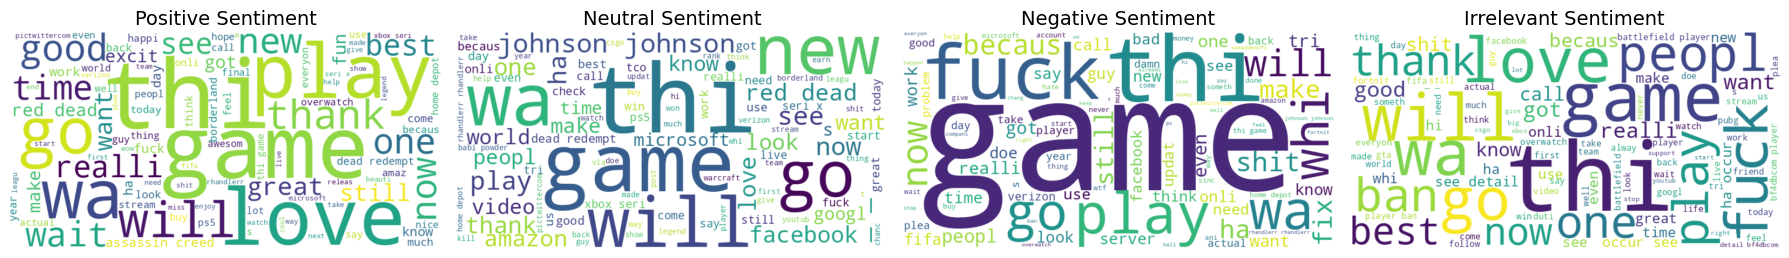

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get unique sentiments
sentiments = df['sentiment'].unique()

# Create subplots: 1 row, N columns (for example, 3)
fig, axes = plt.subplots(1, len(sentiments), figsize=(18, 6))

# If only one sentiment, axes isn't iterable — handle that case
if len(sentiments) == 1:
    axes = [axes]

for i, sentiment in enumerate(sentiments):
    # Combine all text for this sentiment
    text_data = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='viridis',
                          max_words=100).generate(text_data)
    
    # Plot in the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'{sentiment.capitalize()} Sentiment', fontsize=14)
    axes[i].axis('off')

# Adjust spacing
plt.tight_layout()
plt.show()


In [77]:
SAVE_PATH = DATASET_DIR / "preprocessed" 
SAVE_PATH.mkdir(exist_ok=True)
df.to_csv(SAVE_PATH / "twitter_training.csv" )